## Polynomial Regression
By- Satyabrata Pradhan(23EE65R20)    
    
    
   G.B Kevin Arjun(23EE65R19)

In [14]:
# Importing essential libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Generate Dataset

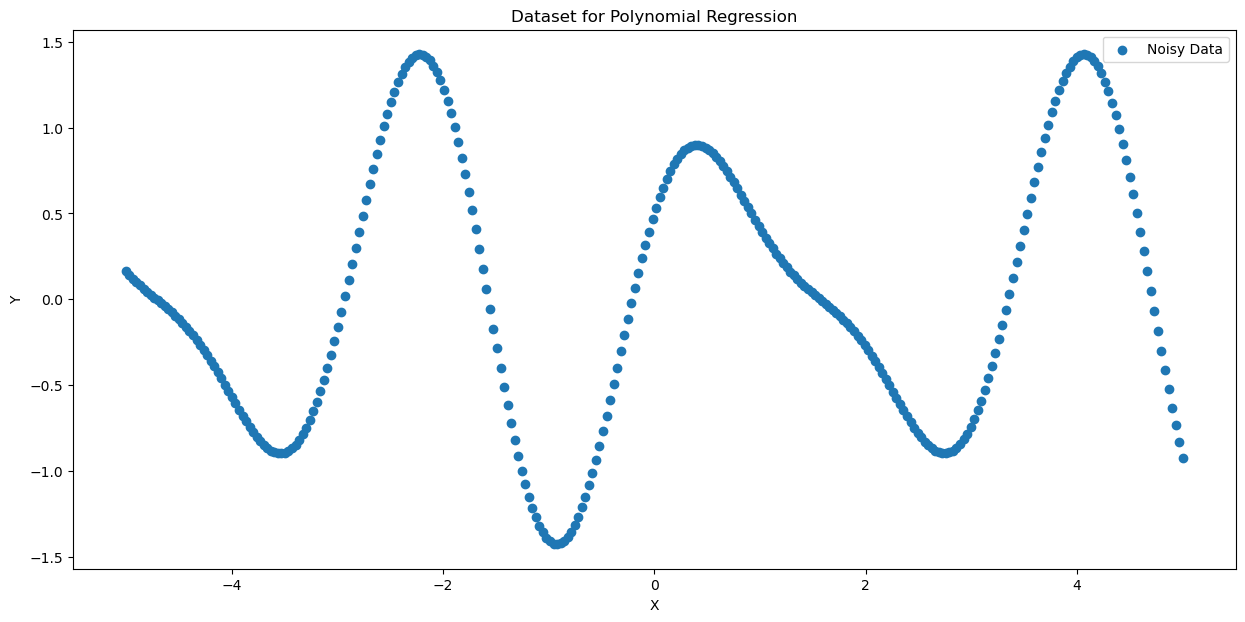

In [110]:
# Set random seed for reproducibility
np.random.seed(20)

# Generate x values
x = np.linspace(-5, 5, 300).reshape((-1, 1))


# Generate y values using a combination of sine, cosine, and polynomial functions with added noise
#noise = np.random.normal(0, 1, x.shape)
#y_true = np.sin(2 * x) + 0.5 * x ** 2 + np.cos(3 * x)
y_true = np.sin(2 * x) + ((0.5 ) * np.cos(3 * x))
y_noisy = y_true #+ noise

y = y_noisy.reshape((-1, 1))

# Plot the true function and the different models
plt.figure(figsize=(15, 7))
plt.scatter(x, y_noisy, label='Noisy Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Dataset for Polynomial Regression')
plt.show()

In [111]:
np.shape(x), np.shape(y)

((300, 1), (300, 1))

In [126]:
# Create the matrix X for polynomial degree n
degrees = 4
X = np.ones_like(x)
for i in range(degrees):
    X = np.hstack((X, x **(i+1)))

# Split the dataset into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * x.shape[0])

X_train, X_test = X[:split_index, :], X[split_index:, :]
y_train, y_test = y[:split_index, :], y[split_index:, :]


In [127]:
np.shape(X_train), np.shape(X_test)

((240, 5), (60, 5))

### Function to implement gradient descent

In [128]:
def train_model(X, y, theta, lr, epochs):
    m = len(y)     #number of samples
    history = []   #Initialize array to store training loss values

    for epoch in range(epochs):
        y_hat = np.dot(X, theta)  #predicted value
        
        #Compute error between true value and predicted value
        error = y_hat - y
        
        #Compute Gradient
        gradient = np.dot(X.T, error) / m
        
        #Update theta
        theta -= lr * gradient
        
        #Cost function
        cost = np.sum(error ** 2) / (2 * m)  #MSE loss function
        
        history.append(cost)
        print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {float(cost):.4f}')

    return theta, history

In [136]:
# Initialize theta with zeros
theta_init = np.zeros((X_train.shape[1], 1))

# Set learning rate and number of epochs
learning_rate = 1e-4
num_epochs = 500

# Run gradient descent
theta_final, loss_history = train_model(X_train, y_train, theta_init, learning_rate, num_epochs)

Epoch 1/500, Train Loss: 0.2779
Epoch 2/500, Train Loss: 0.2955
Epoch 3/500, Train Loss: 0.3643
Epoch 4/500, Train Loss: 0.6290
Epoch 5/500, Train Loss: 1.6436
Epoch 6/500, Train Loss: 5.5282
Epoch 7/500, Train Loss: 20.3984
Epoch 8/500, Train Loss: 77.3168
Epoch 9/500, Train Loss: 295.1801
Epoch 10/500, Train Loss: 1129.0794
Epoch 11/500, Train Loss: 4320.9315
Epoch 12/500, Train Loss: 16538.1336
Epoch 13/500, Train Loss: 63300.9570
Epoch 14/500, Train Loss: 242291.3349
Epoch 15/500, Train Loss: 927398.7114
Epoch 16/500, Train Loss: 3549730.2712
Epoch 17/500, Train Loss: 13587022.2968
Epoch 18/500, Train Loss: 52005974.6317
Epoch 19/500, Train Loss: 199059173.3154
Epoch 20/500, Train Loss: 761923122.7137
Epoch 21/500, Train Loss: 2916353141.0187
Epoch 22/500, Train Loss: 11162695278.8193
Epoch 23/500, Train Loss: 42726569749.5072
Epoch 24/500, Train Loss: 163541126670.9906
Epoch 25/500, Train Loss: 625973493067.8666
Epoch 26/500, Train Loss: 2395989449260.8857
Epoch 27/500, Train Loss

In [137]:
theta_final

array([[ 1.04828202e+140],
       [-3.92895128e+140],
       [ 1.80131425e+141],
       [-7.59552369e+141],
       [ 3.46515788e+142]])

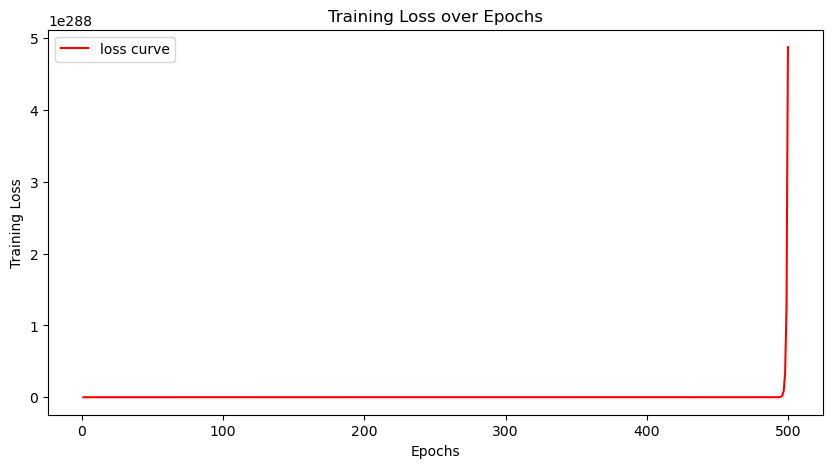

In [138]:
# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history, linestyle='-', color='r', label='loss curve')                                     # marker='o'
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()


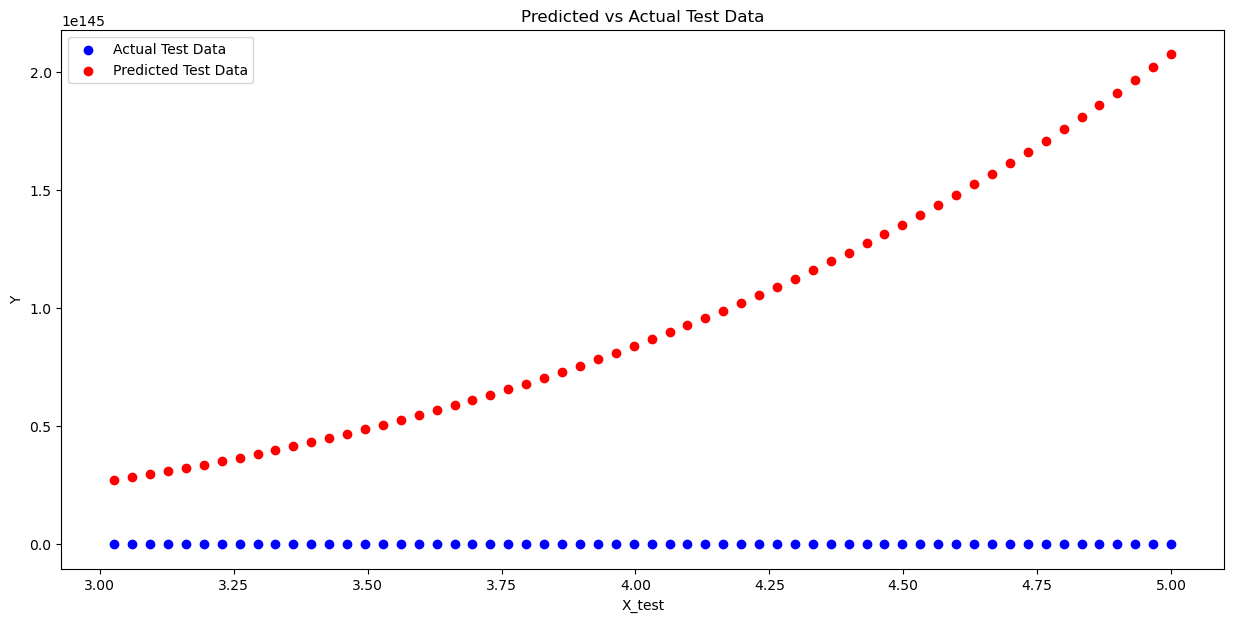

In [139]:
# Predict values for the test set
y_pred = np.dot(X_test, theta_final)

# Plot the predicted values against the actual values
plt.figure(figsize=(15, 7))
plt.scatter(x[split_index:], y_test, label='Actual Test Data', color='blue')
plt.scatter(x[split_index:], y_pred, label='Predicted Test Data', color='red')
plt.xlabel('X_test')
plt.ylabel('Y')
plt.legend()
plt.title('Predicted vs Actual Test Data')
plt.show()


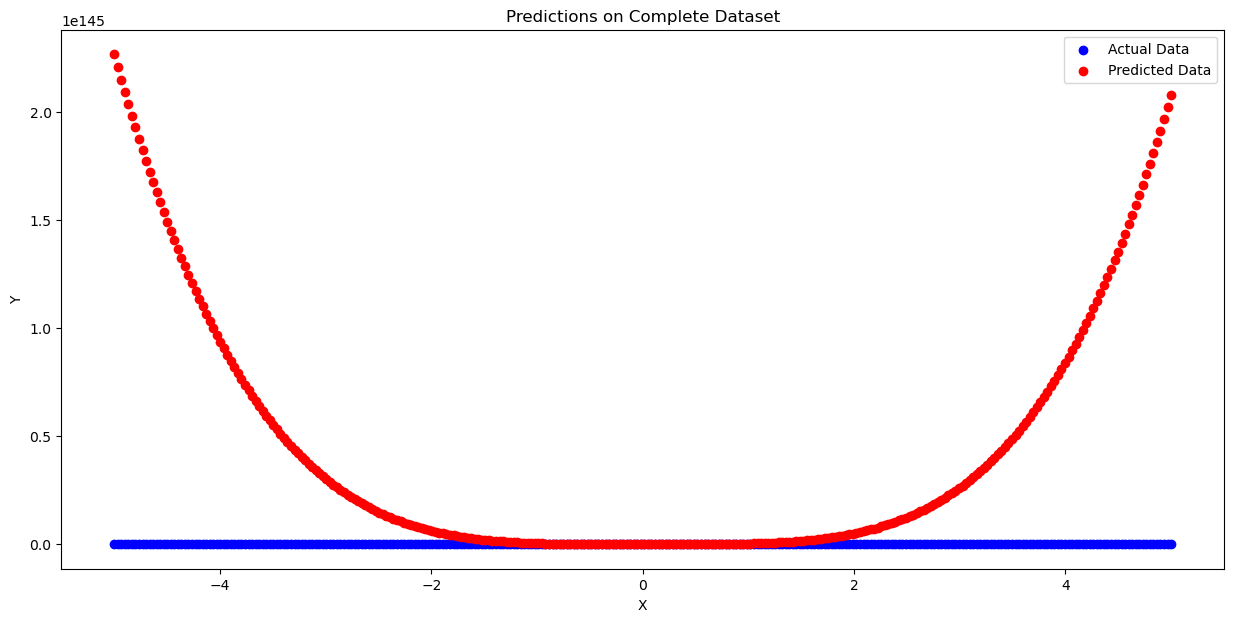

In [140]:
# Predict values for the complete data-set
y_pred = np.dot(X, theta_final)

# Plot the predicted values against the actual values
plt.figure(figsize=(15, 7))
plt.scatter(x, y, label='Actual Data', color='blue')
plt.scatter(x, y_pred, label='Predicted Data', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Predictions on Complete Dataset')
plt.show()